In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
def rotaciona_corrente(zonal, meridional, phi):
    phi = np.deg2rad(60)
    ul = zonal * np.cos(phi) + meridional * np.sin(phi)
    vl = -zonal * np.sin(phi) + meridional * np.cos(phi)
    return ul, vl

In [3]:
cd '/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos/'

/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos


In [4]:
uboia = pd.read_csv('adcp-zonal-limpo.csv', delimiter=';')
vboia = pd.read_csv('adcp-meridional-limpo.csv', delimiter=';')

In [5]:
#profundidades boia
#depthBoia = list(np.arange(5.5, 55, 2.5))
#depthBoia = [str(ii) for ii in depthBoia]

In [6]:
tempoBoia = uboia.time

In [7]:
tempoBoia = np.array([dt.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in tempoBoia])

In [8]:
tempoBoia[0], tempoBoia[-1]

(datetime.datetime(2016, 11, 18, 20, 0), datetime.datetime(2017, 12, 4, 13, 0))

In [9]:
uboia.drop(['time'], axis=1, inplace=True)
vboia.drop(['time'], axis=1, inplace=True)

### removendo dados ruins

<AxesSubplot:>

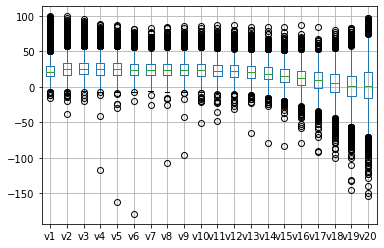

In [20]:
vboia.boxplot()

<AxesSubplot:>

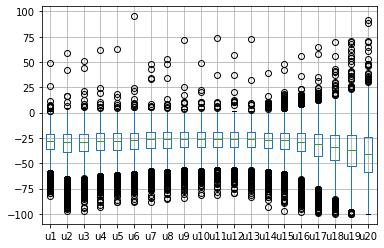

In [19]:
uboia.boxplot()

In [21]:
uboia[((uboia)>100|(uboia<-100))].count()/len(uboia)

u1     0.001423
u2     0.001532
u3     0.001641
u4     0.001751
u5     0.001751
u6     0.002298
u7     0.001751
u8     0.001532
u9     0.001423
u10    0.001423
u11    0.001423
u12    0.001094
u13    0.001094
u14    0.002298
u15    0.007113
u16    0.009740
u17    0.013898
u18    0.018385
u19    0.022543
u20    0.025717
dtype: float64

In [22]:
vboia[((vboia)>100|(vboia<-100))].count()/len(vboia)

v1     0.550449
v2     0.555154
v3     0.557015
v4     0.558766
v5     0.558984
v6     0.558437
v7     0.556358
v8     0.556577
v9     0.557124
v10    0.555154
v11    0.552309
v12    0.547932
v13    0.539177
v14    0.519260
v15    0.488728
v16    0.438827
v17    0.391661
v18    0.328409
v19    0.272270
v20    0.281134
dtype: float64

In [23]:
ulNulls = ((uboia>=100) | (uboia<=-100))
vlNulls = (vboia>=100)

In [24]:
uboia[ulNulls] = np.NaN
vboia[vlNulls] = np.NaN

In [25]:
tempoBoia[0], tempoBoia[-1]

(datetime.datetime(2016, 11, 18, 20, 0), datetime.datetime(2017, 12, 4, 13, 0))

### Ajustando os dados da boia

In [26]:
tmin = dt.strptime('2016-12-01 00:00','%Y-%m-%d %H:%M')
tmax = dt.strptime('2017-09-18 12:00','%Y-%m-%d %H:%M')

In [27]:
condtime = ((tempoBoia>=tmin) & (tempoBoia<=tmax))

In [28]:
vboia = vboia.loc[condtime, :]
uboia = uboia.loc[condtime, :]

In [29]:
tempoAjustado = tempoBoia[condtime]

In [30]:
del tempoBoia

### rotacao dos dados da boia

In [31]:
vboia = np.array(vboia)
uboia = np.array(uboia)

In [32]:
ul, vl = rotaciona_corrente(uboia, vboia, 60)

In [33]:
del vboia, uboia

In [34]:
ul = pd.DataFrame(ul)
vl = pd.DataFrame(vl)

### calculo das médias diarias

In [35]:
ul['year'] = pd.DatetimeIndex(tempoAjustado).year
ul['month'] = pd.DatetimeIndex(tempoAjustado).month
ul['day'] = pd.DatetimeIndex(tempoAjustado).day

In [36]:
vl['year'] = pd.DatetimeIndex(tempoAjustado).year
vl['month'] = pd.DatetimeIndex(tempoAjustado).month
vl['day'] = pd.DatetimeIndex(tempoAjustado).day

In [37]:
uboia24 = ul.groupby(['year','month','day']).mean().reset_index()
vboia24 = vl.groupby(['year','month','day']).mean().reset_index()

In [38]:
uboia24.drop(['year','month','day'],axis=1 ,inplace=True)
vboia24.drop(['year','month','day'],axis=1 ,inplace=True)

## Salvando as médias diárias

<AxesSubplot:>

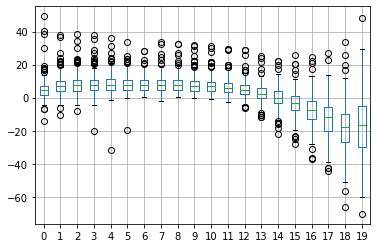

In [39]:
uboia24.boxplot()

<AxesSubplot:>

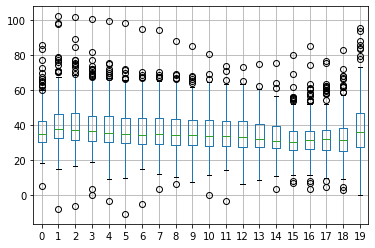

In [40]:
vboia24.boxplot()

In [41]:
uboia24[uboia24>=150] = np.NaN
vboia24[vboia24>=150] = np.NaN

In [42]:
tempoDias = pd.date_range(start='2016-12-01 00:00', end='2017-09-18 00:00', freq='1D')

In [43]:
uboia24['time'] = tempoDias;
vboia24['time'] = tempoDias;

In [44]:
uboia24.to_csv('ulboia_media_24horas.csv', sep=';', index=False)
vboia24.to_csv('vlboia_media_24horas.csv', sep=';', index=False)

In [ ]:
pwd

### FIM